![alt text](https://upload.wikimedia.org/wikipedia/commons/4/4c/Centro_internacional.JPG "Bogotá")

# Real Estate Approach in Bogotá: Neighborhood Clustering and Price Analysis of Used Apartments. 

## Data Science Capstone Project

Author: Juan Diego Moreno

Date: 08-08-2020

Bogotá, Colombia

LinkedIn: [Juan Diego Moreno Gracia](https://www.linkedin.com/in/juan-diego-moreno-gracia/)

# 1. Introduction

## 1.1. Problem Statement

Bogotá is the capital city of Colombia with an area of 1775 km2 and more than 7.200.000 inhabitants that ensures it first place in the rank of population density of the nation [(EL TIEMPO, 2018)](https://www.eltiempo.com/bogota/bogota-es-una-de-las-ciudades-con-mas-densidad-poblacional-del-mundo-240412#:~:text=Bogot%C3%A1-,Bogot%C3%A1%2C%20una%20de%20las%20ciudades%20con%20m%C3%A1s%20densidad%20de%20poblaci%C3%B3n,24.643%20personas%20por%20kil%C3%B3metro%20cuadrado.). Not less, Bogotá is divided into 20 localities and 1922 neighborhoods [(culturarecreacionydeporte.gov.co)](https://www.culturarecreacionydeporte.gov.co/sites/default/files/convocatorias_cartillas_y_anexos/listado_de_barrios_46.pdf).  In a city this big, finding an appropriate living place that fits the needs of every citizen is a very interesting challenge.

How can a person find the best location for a place to live when there are so many neighborhoods to choose? The aim of this project is to explore some of the neighborhoods of Bogotá and try to give the reader a closer idea of the top venues that can be found in this city. This project is divided into 2 phases. The first phase explains the behavior of prices in Bogotá using linear regression models, while the second phase explores the venues of each neighborhood using the Foursquare API and group them using a Machine Learning process of Clustering.

## 1.2. Methodology

The methodology that was used for this project is aligned with the Data Science Methodology proposed by John B. Rollins, a data scientist from IBM Analytics organization with engineering, data mining, and econometrics background in many industries [(IBM, 2015)](https://www.ibm.com/downloads/cas/WKK9DX51). The methodology encompasses 10 flexible steps that go from the problem understanding to the final conclusions obtain after a hard but very satisfactory road of analysis. For the aim of this project, only the first 8 stages of the Data Science Methodology were used.

#<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab1_fig2_datascience_methodology_flowchart.png" width = 750> 
![alt text](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab1_fig2_datascience_methodology_flowchart.png "Bogotá")

This image represents Data Science Methodology. We will pass across all of the steps in the development of this project. Please take a look at the graph and the flow of the stages. This is a flexible methodology that allows the data scientist to advance in the process and go back to previous stages to make commit changes. 

# 2. Price Analysis of Used Apartments in Bogotá

Finding the most suitable data sources to use in exploring Bogotá's neighborhoods was one of the most difficult tasks the project represented. As it was mentioned in the problem statement, this project was divided into 2 stages for which a basis dataset was built as it is explained in the following lines.

## 2.1.1. Data Collection and Data Understanding

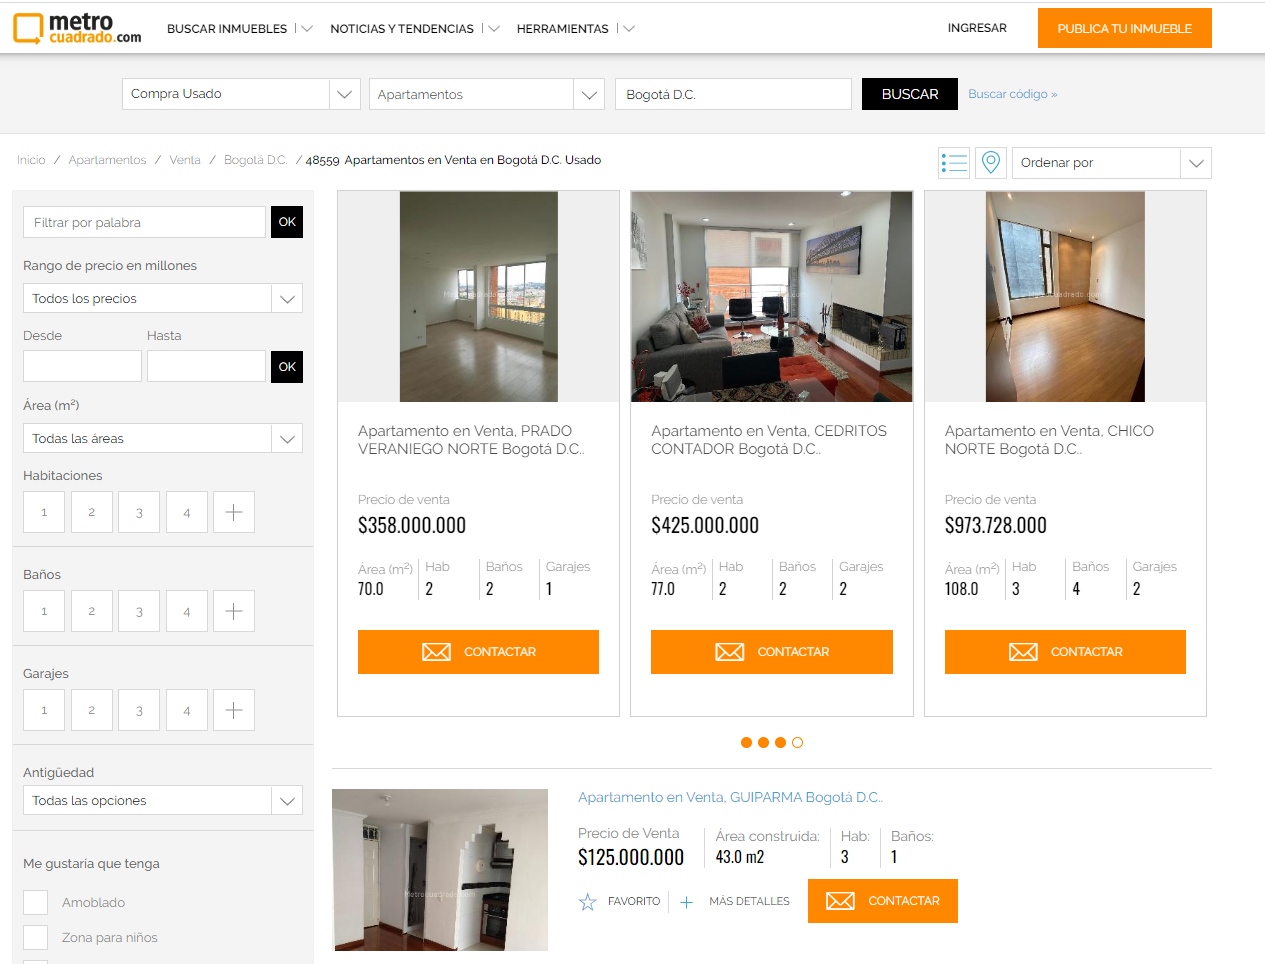

For the exploration of price behavior in Bogotá, a data frame was made with the information of more than 6000 used apartments that were published in metrocuadrado.com. metrocuadrado.com is a web page of buying and publishing new and used housing in Colombia. This information was selected randomly and the only filters applied were "used apartments" and the location: "Bogotá D.C.". It is important to emphasize that this data will only be used for the practical use of this academic project and will not be used for any institutional use.

1. City
2. Neighborhood
3. Sale price
4. Area of the apartment
5. Number of bedrooms
6. Number of bathrooms

In [1]:
import pandas as pd # useful for many scientific computing in Python
import numpy as np # primary data structure library

In [2]:
# The code was removed by Watson Studio for sharing.

,web-scraper-order,web-scraper-start-url,name,area,bedrooms,bathrooms,garages,price
0,1596674546-6607,https://www.metrocuadrado.com/apartamentos/ven...,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",45.0 m2,1,2,1.0,$367.000.000
1,1596674546-7443,https://www.metrocuadrado.com/apartamentos/ven...,"Apartamento en Venta, LOS CEDRITOS Bogotá D.C..",195.0 m2,4,4,2.0,$950.000.000
2,1596674546-10532,https://www.metrocuadrado.com/apartamentos/ven...,"Apartamento en Venta, SANTA HELENA Bogotá D.C..",75.0 m2,3,2,1.0,$360.000.000
3,1596674546-9518,https://www.metrocuadrado.com/apartamentos/ven...,"Apartamento en Venta, PARDO RUBIO Bogotá D.C..",82.0 m2,2,2,2.0,$415.000.000
4,1596674546-8015,https://www.metrocuadrado.com/apartamentos/ven...,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",165.0 m2,3,3,2.0,$860.000.000


In [3]:
print("The size of the dataframe retrieved consist in {} rows and {} columns".format(apartments_df.shape[0],apartments_df.shape[1]))

The size of the dataframe retrieved consist in 6382 rows and 8 columns


## 2.1.2. Data Preparation and Data Cleaning 

Data cleaning of this dataset represented a huge challenge since the amount of information that it contained was very extensive. The original dataset obtained with the scraper process had a total of 6382 rows that represent different apartments and 8 columns that contained the properties of all of them. The first step in data cleaning consisted in droping the fisrt 2 columns of the dataframe because they didn´t apport any valuable information to the project.

In [4]:
apartments_df.drop(["web-scraper-order","web-scraper-start-url"], axis=1,inplace=True)
apartments_df.head()

,name,area,bedrooms,bathrooms,garages,price
0,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",45.0 m2,1,2,1.0,$367.000.000
1,"Apartamento en Venta, LOS CEDRITOS Bogotá D.C..",195.0 m2,4,4,2.0,$950.000.000
2,"Apartamento en Venta, SANTA HELENA Bogotá D.C..",75.0 m2,3,2,1.0,$360.000.000
3,"Apartamento en Venta, PARDO RUBIO Bogotá D.C..",82.0 m2,2,2,2.0,$415.000.000
4,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",165.0 m2,3,3,2.0,$860.000.000


Continuing with the data cleaning process, the column *name* must be splited into more columns to get the neighboorhoods in a separated column, as it is shown:  

In [5]:
description = apartments_df["name"].str.split(", ", n=1, expand=True)
apartments_df["location"] = description[1]
apartments_df.head()

,name,area,bedrooms,bathrooms,garages,price,location
0,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",45.0 m2,1,2,1.0,$367.000.000,LA CAROLINA Bogotá D.C..
1,"Apartamento en Venta, LOS CEDRITOS Bogotá D.C..",195.0 m2,4,4,2.0,$950.000.000,LOS CEDRITOS Bogotá D.C..
2,"Apartamento en Venta, SANTA HELENA Bogotá D.C..",75.0 m2,3,2,1.0,$360.000.000,SANTA HELENA Bogotá D.C..
3,"Apartamento en Venta, PARDO RUBIO Bogotá D.C..",82.0 m2,2,2,2.0,$415.000.000,PARDO RUBIO Bogotá D.C..
4,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",165.0 m2,3,3,2.0,$860.000.000,LA CAROLINA Bogotá D.C..


In [6]:
description2 = apartments_df["location"].str.split("Bogotá D.C..", n=1, expand=True)
right = apartments_df['location'].str[-12:]
apartments_df["city"]=right
apartments_df["neighborhood"]=description2[0]
apartments_df.head()

,name,area,bedrooms,bathrooms,garages,price,location,city,neighborhood
0,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",45.0 m2,1,2,1.0,$367.000.000,LA CAROLINA Bogotá D.C..,Bogotá D.C..,LA CAROLINA
1,"Apartamento en Venta, LOS CEDRITOS Bogotá D.C..",195.0 m2,4,4,2.0,$950.000.000,LOS CEDRITOS Bogotá D.C..,Bogotá D.C..,LOS CEDRITOS
2,"Apartamento en Venta, SANTA HELENA Bogotá D.C..",75.0 m2,3,2,1.0,$360.000.000,SANTA HELENA Bogotá D.C..,Bogotá D.C..,SANTA HELENA
3,"Apartamento en Venta, PARDO RUBIO Bogotá D.C..",82.0 m2,2,2,2.0,$415.000.000,PARDO RUBIO Bogotá D.C..,Bogotá D.C..,PARDO RUBIO
4,"Apartamento en Venta, LA CAROLINA Bogotá D.C..",165.0 m2,3,3,2.0,$860.000.000,LA CAROLINA Bogotá D.C..,Bogotá D.C..,LA CAROLINA


After spliting the column *name* into 3 diferent columns: location, city, and neighborhood, all the symbols such as **$**, **.**, **m2**, **+** where replaced and the types of each column where fixed.

In [7]:
apartments_df["price"]=apartments_df["price"].str.replace("$","")
apartments_df["price"]=apartments_df["price"].str.replace(".","")
apartments_df[["price"]]=apartments_df[["price"]].astype("int")

In [8]:
apartments_df["area"]=apartments_df["area"].str.replace(" m2","")
apartments_df["area"]=apartments_df["area"].astype("float")

In [9]:
apartments_df[["bedrooms","bathrooms"]]=apartments_df[["bedrooms","bathrooms"]].replace("5+","5")
apartments_df[["bedrooms","bathrooms"]]=apartments_df[["bedrooms","bathrooms"]].astype("float")

The next step is looking for missing or wrong values for neighborhoods and convert them to NaN (Not a Number).   

In [10]:
apartments_df[(apartments_df["neighborhood"]== "N.N. ") | (apartments_df["neighborhood"]== "N.N ") | (apartments_df["neighborhood"]== "") | (apartments_df["neighborhood"]== " ")]

,name,area,bedrooms,bathrooms,garages,price,location,city,neighborhood
225,"Apartamento en Venta, Bogotá D.C. Bogotá D.C..",160.0,3.0,2.0,2.0,980000000,Bogotá D.C. Bogotá D.C..,Bogotá D.C..,
636,"Apartamento en Venta, Bogotá D.C..",192.0,3.0,4.0,2.0,1300000000,Bogotá D.C..,Bogotá D.C..,
851,"Apartamento en Venta Y Arriendo, N.N. Bogotá D...",420.0,4.0,4.0,NaN,2700000000,N.N. Bogotá D.C..,Bogotá D.C..,N.N.
924,"Apartamento en Venta Y Arriendo, Bogotá D.C..",171.7,3.0,4.0,2.0,2138000000,Bogotá D.C..,Bogotá D.C..,
3400,"Apartamento en Venta, Bogotá D.C..",70.0,2.0,2.0,1.0,345000000,Bogotá D.C..,Bogotá D.C..,
3456,"Apartamento en Venta, Bogotá D.C. Bogotá D.C..",390.0,4.0,5.0,NaN,2150000000,Bogotá D.C. Bogotá D.C..,Bogotá D.C..,
3701,"Apartamento en Venta, N.N Bogotá D.C..",38.0,2.0,1.0,NaN,39900000,N.N Bogotá D.C..,Bogotá D.C..,N.N
4369,"Apartamento en Venta, N.N. Bogotá D.C..",185.0,3.0,5.0,3.0,1350000000,N.N. Bogotá D.C..,Bogotá D.C..,N.N.
5001,"Apartamento en Venta, Bogotá D.C..",63.0,3.0,2.0,1.0,260000000,Bogotá D.C..,Bogotá D.C..,
6229,"Apartamento en Venta Y Arriendo, Bogotá D.C..",440.0,5.0,5.0,4.0,4200000000,Bogotá D.C..,Bogotá D.C..,


As it can be seen, there is no way to know the neighborhood of this apartments, so the rigth path is droping this apartments. 

In [11]:
apartments_df.replace("N.N. ", np.nan, inplace=True)
apartments_df.replace("N.N ", np.nan, inplace=True)
apartments_df.replace(" ", np.nan, inplace=True)
apartments_df.replace("", np.nan, inplace=True)
apartments_df.dropna(subset=["neighborhood"], axis=0, inplace=True)

Lets check the types of the columns in our dataframe.

In [12]:
apartments_df.dtypes

name             object
area            float64
bedrooms        float64
bathrooms       float64
garages         float64
price             int64
location         object
city             object
neighborhood     object
dtype: object

Up to this point, we have achieved a great avance but the path is still long. We create a new dataframe containing only the columns that we need. 

In [13]:
bog_df=apartments_df[["city","neighborhood","area","bedrooms","bathrooms","garages","price"]]
bog_df.head()

,city,neighborhood,area,bedrooms,bathrooms,garages,price
0,Bogotá D.C..,LA CAROLINA,45.0,1.0,2.0,1.0,367000000
1,Bogotá D.C..,LOS CEDRITOS,195.0,4.0,4.0,2.0,950000000
2,Bogotá D.C..,SANTA HELENA,75.0,3.0,2.0,1.0,360000000
3,Bogotá D.C..,PARDO RUBIO,82.0,2.0,2.0,2.0,415000000
4,Bogotá D.C..,LA CAROLINA,165.0,3.0,3.0,2.0,860000000


To manage smaller price values, the price column will be divided into 1.000 so the prices will be read in thousands.  

In [14]:
bog_df[["price"]]=bog_df[["price"]]/1000

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Lets check if there is any null values in the bedrooms, bathrooms, garages. If there there are missing values, they are going to be replace by the mean of every categorty. 

In [15]:
print("Number of NaN values for the column bedrooms :", bog_df["bedrooms"].isnull().sum())
print("Number of NaN values for the column bathrooms :", bog_df['bathrooms'].isnull().sum())
print("Number of NaN values for the column garages :", bog_df['garages'].isnull().sum())

Number of NaN values for the column bedrooms : 1
Number of NaN values for the column bathrooms : 21
Number of NaN values for the column garages : 447


In [16]:
bed_mean = bog_df["bedrooms"].mean()
bog_df["bedrooms"].replace(np.nan, bed_mean, inplace = True)
print("Average number of bedrooms: ",bed_mean)

Average number of bedrooms:  2.66520169518129


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
bath_mean = bog_df["bathrooms"].mean()
bog_df["bathrooms"].replace(np.nan, bath_mean, inplace = True)
print("Average number of bathrooms: ",bath_mean)

Average number of bathrooms:  2.8860022043772635


In [18]:
garage_mean = bog_df["garages"].mean()
bog_df["garages"].replace(np.nan, garage_mean, inplace = True)
print("Average number of garages: ",garage_mean)

Average number of garages:  1.9583122362869199


Lets use some visualizations to undestand how the prices are distributed in Bogotá. To start, we will make a scatter plot to see the relationship between *area* and *price*

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

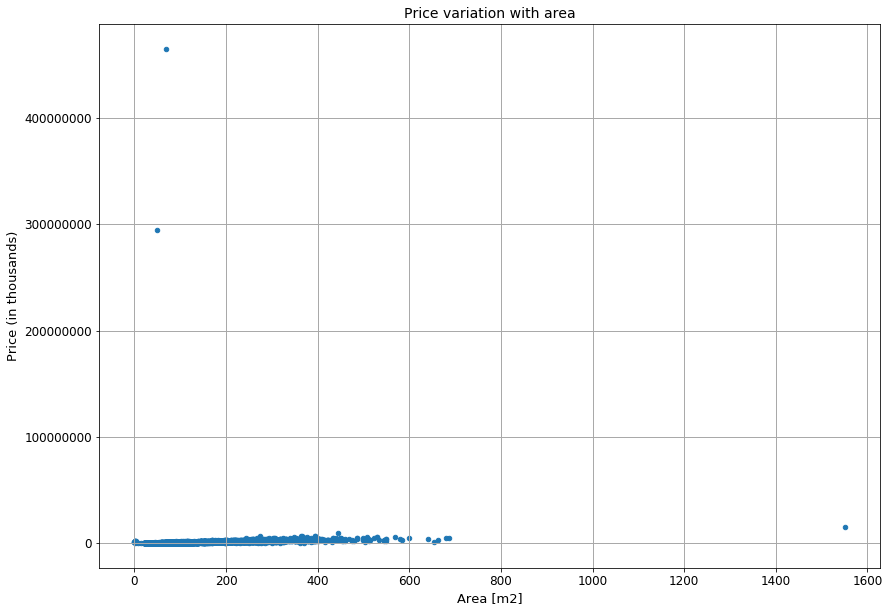

In [20]:
bog_df.plot(kind="scatter", x="area", y="price", figsize=(14,10), fontsize=12)

plt.title("Price variation with area", fontsize=14)
plt.ylabel("Price (in thousands)", fontsize=13)
plt.xlabel("Area [m2]", fontsize=13)

plt.grid(color="darkgrey", linestyle="-", linewidth=1)
plt.yticks(np.arange(0,bog_df["price"].max()+20000,100000000))
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

As it can be seen in the scatter plot, there seems to be some very outdated values. With the *describe()* method it is easy to identify these cases thowgh a simple table that sums up basic statistical information. 

In [21]:
#With this line of code, describe method will show results in non scientific notation
bog_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,area,bedrooms,bathrooms,garages,price
count,6372,6372,6372,6372,6372
mean,138.739,2.6652,2.886,1.95831,1.04537e+06
std,88.6632,0.795813,1.10261,0.804428,6.9306e+06
min,0,1,1,1,29
25%,76,2,2,1,398000
50%,114,3,3,2,650000
75%,176.7,3,4,2,1.2e+06
max,1550,5,5,4,4.65e+08


As it can be seen, there is an apartment that has a price of 29.000 COP pesos, almost 76 USD dollars. In the other extreme, the most expensive apartment cost 465.000.000.000 COP pesos, a value near 123.449.595 USD dollars. Both are extremely irrational values. Additionally, we can notice that the apartment with the smallest area has 0 m2. These values will be drop out of the data frame to avoid further errors in the analysis.

In [22]:
print("There are {} apartments that have an area below 15 m2".format(bog_df[bog_df["area"]<15].shape[0]))
bog_df[bog_df["area"]<15]

There are 17 apartments that have an area below 15 m2


,city,neighborhood,area,bedrooms,bathrooms,garages,price
438,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,1.0,3.0,5.000000,2.000000,1350000.0
967,Bogotá D.C..,CERROS DE LOS ALPES,1.0,3.0,5.000000,2.000000,1280000.0
2277,Bogotá D.C..,BOSQUE DE MODELIA,8.0,3.0,2.000000,1.000000,300000.0
2719,Bogotá D.C..,SAN JOSE DEL PRADO,0.0,3.0,3.000000,2.000000,590000.0
2919,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,3.0,3.0,5.000000,3.000000,1650000.0
2951,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,1.0,3.0,5.000000,3.000000,1730000.0
3471,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,1.0,3.0,5.000000,2.000000,1350000.0
3595,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,1.0,3.0,5.000000,2.000000,1350000.0
3813,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,2.0,3.0,5.000000,3.000000,1570000.0
4654,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,1.0,3.0,4.000000,3.000000,1350000.0


As it can be seen, these apartments have illogical area values specially if we check their prices. Lets drop this rows.  

In [23]:
bog_df.drop(bog_df[bog_df["area"]<15].index, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Now its time to check the apartment prices that have wrong values.

In [24]:
print("There are {} apartments that have a price bellow 10 million pesos or above 100.000 millions pesos".format(bog_df[(bog_df["price"]<10000)|(bog_df["price"]>100000000)].shape[0]))
bog_df[(bog_df["price"]<10000)|(bog_df["price"]>100000000)]

There are 25 apartments that have a price bellow 10 million pesos or above 100.000 millions pesos


,city,neighborhood,area,bedrooms,bathrooms,garages,price
320,Bogotá D.C..,CHICO NORTE III,197.0,3.0,5.0,3.0,4600.0
456,Bogotá D.C..,ANTIGUO COUNTRY,146.0,3.0,3.0,2.0,5200.0
899,Bogotá D.C..,CHICO NORTE III,70.0,2.0,3.0,2.0,465000000.0
1068,Bogotá D.C..,URBANIZACION BOSQUES DE MEDINA,370.0,3.0,4.0,3.0,1950.0
1190,Bogotá D.C..,CHICO NORTE III,148.0,2.0,3.0,2.0,1000.0
1299,Bogotá D.C..,LOS ROSALES,300.0,3.0,4.0,3.0,4500.0
1376,Bogotá D.C..,MOLINOS NORTE,130.0,3.0,4.0,2.0,68.0
1384,Bogotá D.C..,CHICO NORTE II,251.0,3.0,3.0,3.0,1680.0
1828,Bogotá D.C..,CASA BLANCA SUBA,221.0,3.0,3.0,2.0,1120.0
2415,Bogotá D.C..,SANTA TERESA,67.0,3.0,2.0,1.0,29.0


Trying to fix these prices may represent a risk of damaging our analysis so these rows will be drop too.

In [25]:
bog_df.drop(bog_df[(bog_df["price"]<10000)|(bog_df["price"]>100000000)].index, inplace=True)

## 2.1.3. Modelling and Evaluating

Before starting the modelling stage of this project, a scatter plot will be made in order to ensure that we are now the propper dataset.

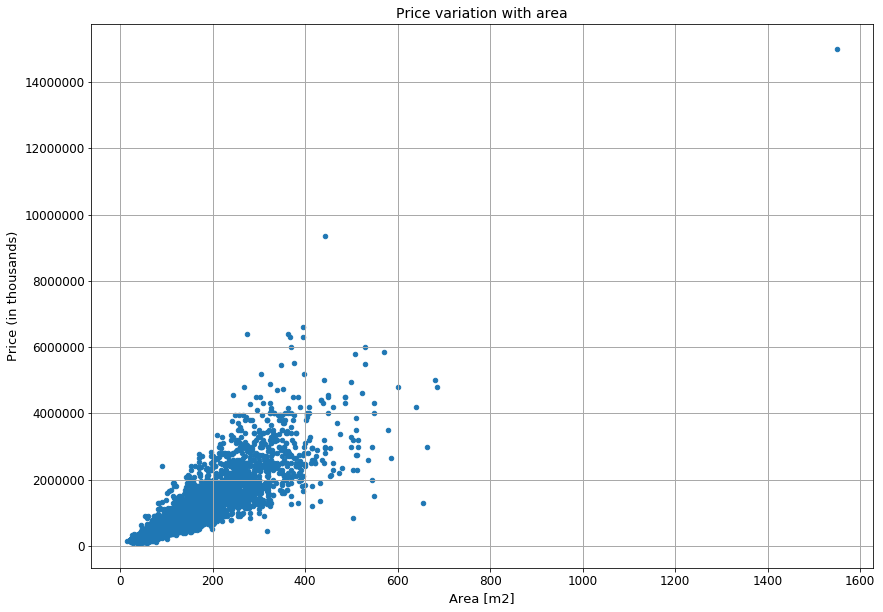

In [26]:
bog_df.plot(kind="scatter", x="area", y="price", figsize=(14,10), fontsize=12)


plt.title("Price variation with area", fontsize=14)
plt.ylabel("Price (in thousands)", fontsize=13)
plt.xlabel("Area [m2]", fontsize=13)

plt.grid(color="darkgrey", linestyle="-", linewidth=1)
plt.yticks(np.arange(0,bog_df["price"].max()+20000,2000000))
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

In [27]:
print("The outlier in the scatter plot belongs to an aparment of 1550 m2 and a price of 15.000.000.000 pesos")
bog_df[bog_df["price"]>10000000]

The outlier in the scatter plot belongs to an aparment of 1550 m2 and a price of 15.000.000.000 pesos


,city,neighborhood,area,bedrooms,bathrooms,garages,price
1980,Bogotá D.C..,CHICO,1550.0,4.0,5.0,4.0,15000000.0


In [28]:
print("This apartment will also be drop out of our dataframe")
bog_df=bog_df.drop(bog_df[bog_df["price"]>10000000].index)

This apartment will also be drop out of our dataframe


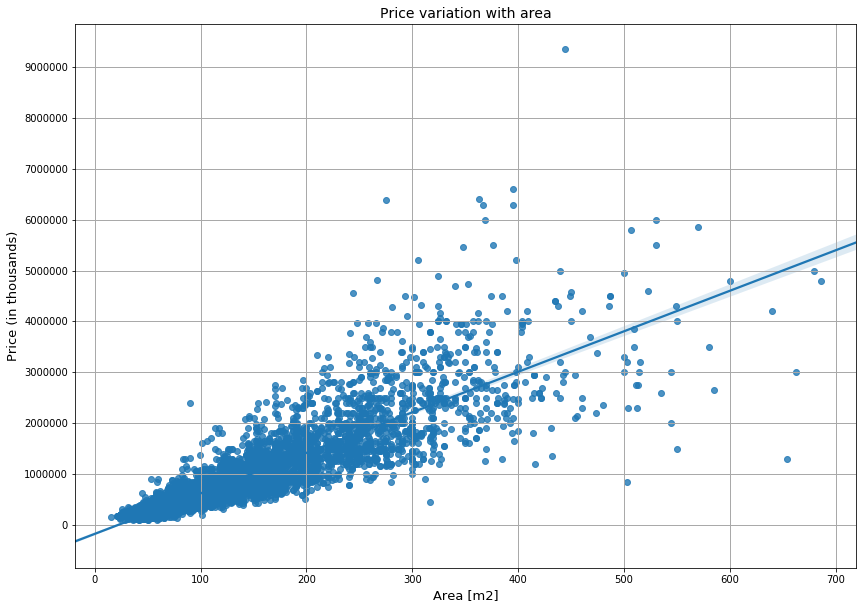

In [29]:
plt.figure(figsize=(14,10))

sns.regplot(x="area", y="price", data=bog_df)

plt.title("Price variation with area", fontsize=14)
plt.ylabel("Price (in thousands)", fontsize=13)
plt.xlabel("Area [m2]", fontsize=13)

plt.grid(color="darkgrey", linestyle="-", linewidth=1)
sns.set(font_scale=1.1, style="whitegrid")

plt.yticks(np.arange(0,bog_df["price"].max()+20000,1000000))
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

In [30]:
#With this line of code, describe method will show results in non scientific notation
bog_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,area,bedrooms,bathrooms,garages,price
count,6329,6329,6329,6329,6329
mean,138.698,2.6634,2.87956,1.95551,926741
std,86.6664,0.796746,1.1004,0.804464,799392
min,15,1,1,1,85000
25%,76,2,2,1,400000
50%,114,3,3,2,650000
75%,176,3,4,2,1.2e+06
max,686,5,5,4,9.36e+06


To sum up to this point, we have a dataset of 6329 apartments for which the smallest one has 15 m2 and the bigest one has 686 m2. In prices, the cheaper aparment is 85 million pesos and the most expensive one is 9.360 million pesos.

As it was seen in the regplot shown before, area seems to have a linear correlation with price. Lets see the realtionship of the other variables with the price.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


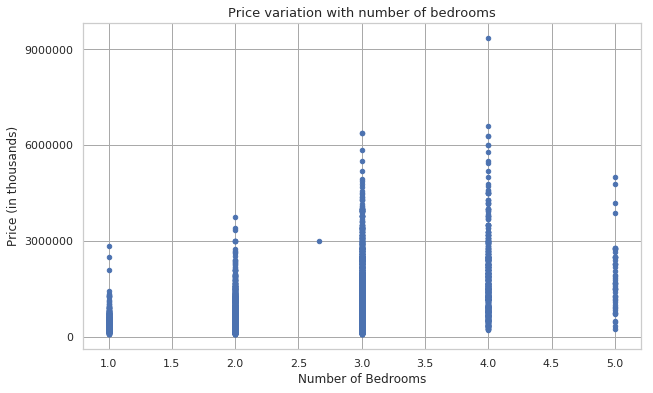

In [31]:
bog_df.plot(kind="scatter", x="bedrooms", y="price", figsize=(10,6), fontsize=11)


plt.title("Price variation with number of bedrooms", fontsize=13)
plt.ylabel("Price (in thousands)", fontsize=12)
plt.xlabel("Number of Bedrooms", fontsize=12)

plt.grid(color="darkgrey", linestyle="-", linewidth=1)
plt.yticks(np.arange(0,bog_df["price"].max()+20000,3000000))
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


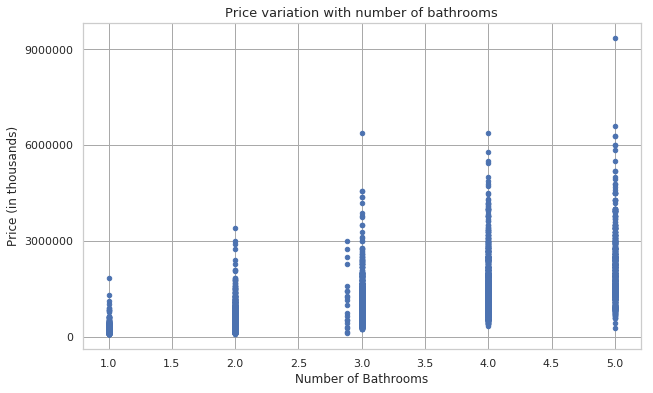

In [32]:
bog_df.plot(kind="scatter", x="bathrooms", y="price", figsize=(10,6), fontsize=11)


plt.title("Price variation with number of bathrooms", fontsize=13)
plt.ylabel("Price (in thousands)", fontsize=12)
plt.xlabel("Number of Bathrooms", fontsize=12)

plt.grid(color="darkgrey", linestyle="-", linewidth=1)
plt.yticks(np.arange(0,bog_df["price"].max()+20000,3000000))
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


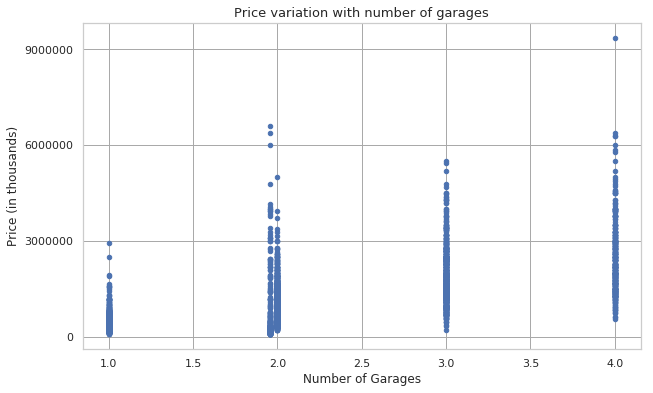

In [33]:
bog_df.plot(kind="scatter", x="garages", y="price", figsize=(10,6), fontsize=11)


plt.title("Price variation with number of garages", fontsize=13)
plt.ylabel("Price (in thousands)", fontsize=12)
plt.xlabel("Number of Garages", fontsize=12)

plt.grid(color="darkgrey", linestyle="-", linewidth=1)
plt.yticks(np.arange(0,bog_df["price"].max()+20000,3000000))
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))

The scatter plots of number of bedrooms, number of bathrooms, and number of garages vs price don´t show a linear correlation between these independent variables and the dependent variable. The method *corr()* will be used in order to obtain the correlation of all the numerical variables. 

In [34]:
bog_df.corr()

,area,bedrooms,bathrooms,garages,price
area,1.000000,0.572695,0.758174,0.703183,0.863766
bedrooms,0.572695,1.000000,0.570582,0.403066,0.400311
bathrooms,0.758174,0.570582,1.000000,0.637496,0.678550
garages,0.703183,0.403066,0.637496,1.000000,0.686894
price,0.863766,0.400311,0.678550,0.686894,1.000000


In [35]:
print("The correlation of number of bedrooms with price is: ",bog_df.corr()["price"].sort_values()[0])
print("The correlation of number of bathrooms with price is: ",bog_df.corr()["price"].sort_values()[1])
print("The correlation of number of garages with price is: ",bog_df.corr()["price"].sort_values()[2])
print("The correlation of area with price is: ",bog_df.corr()["price"].sort_values()[3])

The correlation of number of bedrooms with price is:  0.4003106620074911
The correlation of number of bathrooms with price is:  0.6785496020261635
The correlation of number of garages with price is:  0.6868937218150168
The correlation of area with price is:  0.8637656467549665


The *corr()* showed that the area is the variable that has the biggest correlation with price, while the number of bedrooms was the variable with less correlation with price. In other words, used apartment prices in Bogotá depend largely on their area, while the number of bedrooms don´t seems to afect the price that much.

### 2.1.3.1. Simple Linear Regression Model SLR

Its time to make a simple linear regression model with the variable that have the strongest correlation with price, *area*

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
# Create a Linear Regression object
lm = LinearRegression()

For the simple regression model, area will be the independant variable while price is going to be the dependant variable. Lets fit our model and evaluate it.  

In [38]:
X = bog_df[["area"]]
Y = bog_df[["price"]]
lm.fit(X, Y)
Y_hat = lm.predict(X)

In [39]:
print('The R-square is: ', lm.score(X,Y))
print('The mean square error of price and predicted value is: ', mean_squared_error(bog_df["price"],Y_hat))

The R-square is:  0.7460910925140405
The mean square error of price and predicted value is:  162229099149.32462


### 2.1.3.2. Multiple Linear Regression Model

Althow having an R-square of 0.75 is not a bad result using the variable price, a Multiple Linear Regression Model that considers all the variables may give us better results. The structure of a Multiple Linear Regression follows the following equation:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

For the Multiple Linear Regression all the numeric variables that are in the dataset will be use: area, number of bedrooms, number of bathrooms, and number of garages.

In [40]:
features = ["area", "bedrooms", "bathrooms", "garages"]
features = bog_df[features]

In [41]:
# Create a new Linear Regression object and fit it
lm2 = LinearRegression()
lm2.fit(features, bog_df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
print("The intercept of the multiple linear regression model is: ", lm2.intercept_)

The intercept of the multiple linear regression model is:  -106054.10555307602


In [43]:
print("The coeficients of the multiple linear regression model are: ", lm2.coef_)

The coeficients of the multiple linear regression model are:  [   7366.74424701 -155258.52921595   51014.7177342   141987.33021069]


In [44]:
print("PRICE = {} + {} x AREA + {} x BEDROOMS + {} x BATHROOMS + {} x GARAGES".format(lm2.intercept_,lm2.coef_[0],lm2.coef_[1],lm2.coef_[2],lm2.coef_[3]))

PRICE = -106054.10555307602 + 7366.744247009718 x AREA + -155258.52921594775 x BEDROOMS + 51014.71773419979 x BATHROOMS + 141987.3302106888 x GARAGES


In contrast with the SLR model that was performed before, the MLR equation just obtained show that the area and the number of bathrooms are the variables that affect the less to the price, while the number of bedrooms and the number of garages will represent big variance in the price of an apartment in Bogotá. The following graph represents the accuracy of the MLR model.

Lets graph the behavior of the model accuracy with price. 

In [45]:
#predict values of price
Y_hat2 = lm2.predict(features)

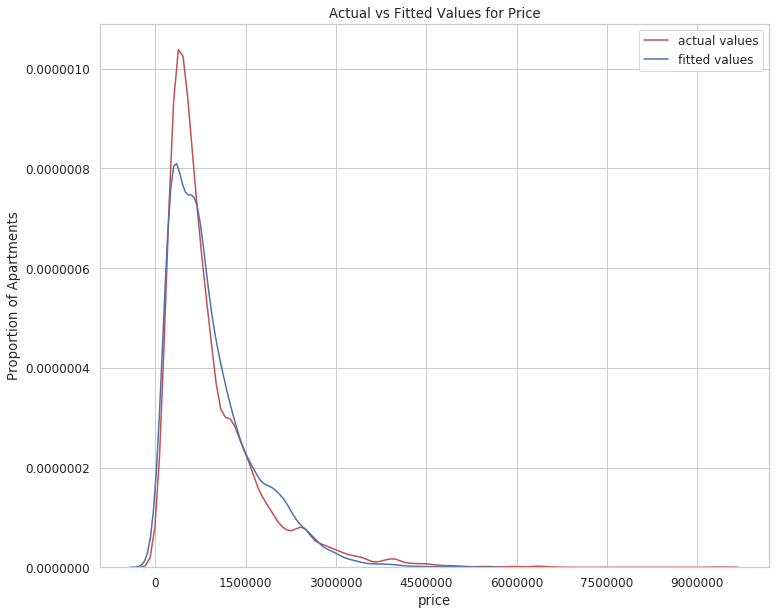

In [46]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(bog_df["price"], hist = False, color = "r", label = "actual values")
sns.distplot(Y_hat2, hist = False, color = "b", label = "fitted values", ax=ax1)


plt.title("Actual vs Fitted Values for Price")
plt.xlabel("price")
plt.ylabel("Proportion of Apartments")

plt.xticks(np.arange(0,bog_df["price"].max()+20000,1500000))
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

plt.show()
plt.close()

The graph above represents how close the predicted values by the MLR model are from the actual values of price. Since the two distributions overlap a bit, the fitted values are reasonably close to the actual values. The MLR model can decently fit the actual values. The evaluation of the accuracy of this model shows the following results

In [47]:
print('The R-square is: ', lm2.score(features, bog_df["price"]))
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(bog_df["price"],Y_hat2))

The R-square is:  0.77371601716627
The mean square error of price and predicted value using multifit is:  144578806039.19815


#### ~ 77.37 % of the variation of the price is explained by this MLR model. In contrast with the SLR model, the MLR shows a better closeness to the actual values of the dataset. Additionally, the mean squared error of the multi-fit is lower than the one obtained with the area as the only independent value.

## 3. Apartment Clustering in Bogotá

## 3.1. Data Collection to Data Preparation

The first step is making a new data frame with only the neighborhoods of Bogotá and the average price of each one.

In [48]:
bogota = bog_df[["neighborhood","price"]].groupby("neighborhood", as_index=False).mean()
bogota.head()

,neighborhood,price
0,ACACIAS USAQUEN,3.764997e+05
1,ACEVEDO TEJADA,3.030000e+05
2,ALAMEDA,8.735000e+05
3,ALCAZARES,6.400000e+05
4,ALCAZARES NORTE,1.190000e+06


For the second part of the project, the Foursquare API was used to get the venues of the neighborhoods that were analyzed in this project. Foursquare is a location technology platform whose purpose is to discover and share information about the places around you: restaurants, coffee shops, libraries, or any other venue. Foursquare is used in companies all over the world to have precise and updated geographical information. Some of the companies that use Foursquare in their platforms are Uber, Apple, Spotify, Snapchat, Mastercard, Twitter, Coco-Cola, and JetBlue, among others [(Foursquare)](https://es.foursquare.com/).

First of all, in order to start using the Foursquare API, the coordinates of each neighborhood must be retrieved. As getting the coordinates of every neighborhood in Bogotá is almost impossible searching them one by one, with the help of ArcGIS Geocoder a data frame with the latitude and longitude of every neighborhood in our data frame was made. It is important to mention that ArcGIS geocoder gets the coordinates of a neighborhood with his name, which in some locations may represent inconsistencies. To this end, a new data frame was made from the 6329 apartments. Data was grouped by neighborhoods and the prices were averaged, resulting in a new data frame of 508 neighborhoods. Using the ArcGIS Geocoder, the resulting data frame was composed of 508 neighborhoods, their average price, and their coordinates as it is shown next.

In [52]:
!pip install geocoder
import geocoder # import geocoder
print("geocoder installed and imported successfully")

     |████████████████████████████████| 102kB 7.6MB/s ta 0:00:011
geocoder installed and imported successfully


After the library geocoder is imported, a function to get the coordinates will be made. The output that we spect is a list with the following information: neighborhood, latitude, longitud.

In [53]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bogotá, Colombia'.format(neighborhood))
        lat_lng_coords = g.latlng
        latitude=lat_lng_coords[0]
        longitude=lat_lng_coords[1]
    return neighborhood,latitude,longitude         

The coordinates will be stored in the list named *coords*

In [54]:
coords = [ get_latlng(neighborhood) for neighborhood in bogota["neighborhood"].tolist()]

Lets take a look to the dataset obtained. 

In [51]:
print("The dataframe has {} different neighborhoods of Bogotá".format(bogota.shape[0]))

The dataframe has 508 different neighborhoods of Bogotá


In [55]:
coordinates=pd.DataFrame(coords, columns=["neighborhood","latitude","longitude"])
coordinates.head()

,neighborhood,latitude,longitude
0,ACACIAS USAQUEN,4.72329,-74.03404
1,ACEVEDO TEJADA,4.63053,-74.08135
2,ALAMEDA,4.54925,-74.13841
3,ALCAZARES,4.66329,-74.07034
4,ALCAZARES NORTE,4.66623,-74.06728


After our dataset is created, the next step consist in merging both dataframes: **bogotá**, and **coordinates**. 

In [56]:
bog_merge=pd.merge(bogota,coordinates, on="neighborhood")
bog_merge.head()

,neighborhood,price,latitude,longitude
0,ACACIAS USAQUEN,3.764997e+05,4.72329,-74.03404
1,ACEVEDO TEJADA,3.030000e+05,4.63053,-74.08135
2,ALAMEDA,8.735000e+05,4.54925,-74.13841
3,ALCAZARES,6.400000e+05,4.66329,-74.07034
4,ALCAZARES NORTE,1.190000e+06,4.66623,-74.06728


In [57]:
print("The dataset that is going to be analized is composed of {} unique neighborhoods of Bogotá". format(bog_merge.shape[0]))

The dataset that is going to be analized is composed of 508 unique neighborhoods of Bogotá


### Plot a map of Bogotá

In order to define an instance of the geocoder a user_agent most be defined, in this case as *bogotá_explorer*.

In [58]:
#!conda install -c conda-forge geopy --yes
#!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [59]:
address = 'Bogotá, Colombia'

geolocator = Nominatim(user_agent="bogotá_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Bogotá are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Bogotá are 4.59808, -74.0760439.


Folium is the library that allow us to generate great maps. Lets import folium and generate a map of Bogotá and its neighborhoods.

In [61]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium # map rendering library
from folium import plugins # useful for grouping points
print("folium installed")

     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011
folium installed


Now that folium is imported, a map of Bogotá will be very useful tu undestand the distribution of the neighborhoods of bogotá.

In [62]:
# create map of Bogotá using latitude and longitude values
bogota_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(bog_merge['latitude'], bog_merge['longitude'], bog_merge['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(bogota_map)  
    
bogota_map

Unfortunatly, there are some neigborhoods that appear in other regions outsite Bogotá. This can be explain due to the similarity between the names of names between Bogotá neighborhoods and other locations in Colombia. This points will be drop out of the dataframe. 

In [63]:
out_of_range=["BOSCONIA ", "SAN ANDRES ", "VALPARAISO ", "EL CHILCAL ", "SAN ALFONSO ", "BILBAO I SECTOR ", "Urbanizacion Bosques De Medina ", "NUEVA GRANADA ","SALITRE II ", "CONCEPCION NORTE ", "SANTA HELENA I ", "SAN PEDRO ", "OLARTE ", "CAMPO ALEGRE ", "UNIDAD CARABELAS ","BALCONES DE ORIENTE ", "BOSQUES DE LA CAÑADA ", "CHAPINERO SUR OCCIDENTAL ", "URBANIZACION CENTRO NORTE ", "BOSQUES DEL MARQUEZ ", "SANTA HELENA ", "TUNAL SECTOR I ", "URBANIZACION BOSQUES DE MEDINA ", "MARANTA III SECTOR "]

In [64]:
out_of_range

['BOSCONIA ',
 'SAN ANDRES ',
 'VALPARAISO ',
 'EL CHILCAL ',
 'SAN ALFONSO ',
 'BILBAO I SECTOR ',
 'Urbanizacion Bosques De Medina ',
 'NUEVA GRANADA ',
 'SALITRE II ',
 'CONCEPCION NORTE ',
 'SANTA HELENA I ',
 'SAN PEDRO ',
 'OLARTE ',
 'CAMPO ALEGRE ',
 'UNIDAD CARABELAS ',
 'BALCONES DE ORIENTE ',
 'BOSQUES DE LA CAÑADA ',
 'CHAPINERO SUR OCCIDENTAL ',
 'URBANIZACION CENTRO NORTE ',
 'BOSQUES DEL MARQUEZ ',
 'SANTA HELENA ',
 'TUNAL SECTOR I ',
 'URBANIZACION BOSQUES DE MEDINA ',
 'MARANTA III SECTOR ']

In [65]:
#See a dataframe with de neighborhoods that will be droped
bog_merge[bog_merge["neighborhood"].isin(out_of_range)]

,neighborhood,price,latitude,longitude
19,BALCONES DE ORIENTE,2.488571e+05,7.073990,-73.096300
33,BILBAO I SECTOR,1.266667e+05,2.917850,-75.274420
34,BOSCONIA,2.802395e+05,9.974090,-73.886990
51,BOSQUES DE LA CAÑADA,1.234000e+06,7.689880,-72.495880
55,BOSQUES DEL MARQUEZ,2.600000e+06,8.566670,-73.450000
66,CAMPO ALEGRE,3.112222e+05,5.572500,-73.880560
93,CHAPINERO SUR OCCIDENTAL,3.377500e+05,7.911110,-72.515070
116,CONCEPCION NORTE,2.200000e+05,3.926620,-74.344370
135,EL CHILCAL,1.350000e+05,1.857280,-76.700940
291,MARANTA III SECTOR,3.783333e+05,2.917850,-75.274420


In [66]:
#Drop neighborhoods that where mapped outside Bogotá
new_bogota = bog_merge[~bog_merge["neighborhood"].isin(out_of_range)]

After droping the wrong located neighborhoods, we can redo the Bogotá map, this time using *MarkCluster()* object make visualization better by grouping neighborhoods by closeness. 

In [67]:
print("The new data frame excluding the neighborhoods with wrong location has {} neighborhoods".format(new_bogota.shape[0]))

The new data frame excluding the neighborhoods with wrong location has 484 neighborhoods


In [68]:
# create map of Bogotá using latitude and longitude values
bogota_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# instantiate a mark cluster object for the neighborhoods in the dataframe
neighborhoods = plugins.MarkerCluster().add_to(bogota_map)

# add markers to map
for lat, lng, neighborhood in zip(new_bogota['latitude'], new_bogota['longitude'], new_bogota['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(neighborhoods)  
    
bogota_map

### Foursquare API

In order to use Foursquare API, remember to stablish user credentials:
1. CLIENT_ID
2. CLIENT_SECRET
3. VERSION

In [69]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: XRWC2XS5LUJ4XV53T3KII243LQJUBMA045GPLDWLHRNFFVAP
CLIENT_SECRET:PUSX01VOB0LEGLEAXHZGZYDQWG11BW0AW1QOXQFERVM0LP4D


In [70]:
import requests # library to handle requests

Foursqueare allow us to find the nearest venues in the neighborhoods of our dataset; however, searching one by one the venues can represent very long human time, so a function will be created to bring **top 50** venues for each neighborhood in a radius of 500 metres. 

In [71]:
LIMIT = 50
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [72]:
bogota_venues = getNearbyVenues(names=new_bogota['neighborhood'],
                                latitudes=new_bogota['latitude'],
                                longitudes=new_bogota['longitude']
                                )

ACACIAS USAQUEN 
ACEVEDO TEJADA 
ALAMEDA 
ALCAZARES 
ALCAZARES NORTE 
ALFEREZ REAL 
ALFONSO LOPEZ 
ALTOS DE MONTEARROYO 
ALTOS DE MONTEARROYO  
ALTOS DE SOTILEZA 
ALTOS DE SUBA 
ALTOS DE USAQUEN 
ALTOS DEL CHICO 
ANTIGUO COUNTRY 
ARBOLEDA DEL CONTRY 
ARMENIA 
ATARDECERES DE SUBA 
ATENAS 
ATLANTA 
BANCO CENTRAL 
BARRANCAS 
BARRANCAS NORTE 
BATAN 
BELALCAZAR 
BELLA SUIZA 
BELLA SUIZA ALTA 
BELLA SUIZA COUNTRY 
BELLAVISTA 
BELLAVISTA OCCIDENTAL 
BELMIRA 
BENJAMIN HERRERA 
BERTHA HERNANDEZ DE OSPINA III 
BOSQUE CALDERON 
BOSQUE CALDERON TEJADA 
BOSQUE DE CASTILLA 
BOSQUE DE KENNDY 
BOSQUE DE LA CAÑADA 
BOSQUE DE LA RESERVA 
BOSQUE DE MODELIA 
BOSQUE DE PINOS 
BOSQUE DE PINOS I 
BOSQUE DE PINOS I   
BOSQUE DEL MARQUES 
BOSQUE DEL MARQUEZ 
BOSQUE IZQUIERDO 
BOSQUE LA RESERVA 
BOSQUE MEDINA 
BOSQUES DE GRATAMIRA 
BOSQUES DE LA RESERVA 
BOSQUES DE PINO 
BOSQUES DE SAN JORGE 
BOSQUES LA RESERVA 
BOYACA 
BRAVO PAEZ 
BRITALIA 
BUENOS AIRES 
Belmira 
Bosque Medina 
CABAÃ¿AS DEL NORTE 
CALANDAIMA 


In [73]:
print("The number of venues retrieved for is: ", bogota_venues.shape[0])
bogota_venues.head()

The number of venues retrieved for is:  8353


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ACACIAS USAQUEN,4.72329,-74.03404,El Kiosco golosinas,4.722658,-74.034035,Snack Place
1,ACACIAS USAQUEN,4.72329,-74.03404,Chopinar,4.724496,-74.032496,Buffet
2,ACACIAS USAQUEN,4.72329,-74.03404,Parque Cedritos,4.723525,-74.033089,Park
3,ACACIAS USAQUEN,4.72329,-74.03404,Ciclovía,4.724147,-74.032551,Bike Rental / Bike Share
4,ACACIAS USAQUEN,4.72329,-74.03404,avenida cero,4.724628,-74.033238,Restaurant


As it was shown, more than 8.000 venues were retrieved for the neighborhoods in our dataset. Let's check how many venues are in some of the neighborhoods.

In [74]:
bogota_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ACACIAS USAQUEN,17,17,17,17,17,17
ACEVEDO TEJADA,18,18,18,18,18,18
ALAMEDA,3,3,3,3,3,3
ALCAZARES,9,9,9,9,9,9
ALCAZARES NORTE,17,17,17,17,17,17
ALFEREZ REAL,4,4,4,4,4,4
ALFONSO LOPEZ,29,29,29,29,29,29
ALTOS DE MONTEARROYO,50,50,50,50,50,50
ALTOS DE MONTEARROYO,50,50,50,50,50,50


In [75]:
print("There are {} unique vanue categories.".format(len(bogota_venues["Venue Category"].unique())))

There are 282 unique vanue categories.


### One-hot encoding

The best way to order the data of venues we collected, is by making one-hot encoding. One-hot encoding is a binary representation of categorical variables like the venues in our dataframe. 

In [76]:
bogota_onehot = pd.get_dummies(bogota_venues[["Venue Category"]], prefix="", prefix_sep="")
bogota_onehot.head()

,Accessories Store,Advertising Agency,African Restaurant,Airport,Airport Terminal,American Restaurant,Animal Shelter,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# add neighborhood column back to dataframe
bogota_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
bogota_onehot['Neighborhood'] = bogota_venues['Neighborhood']
bogota_onehot.head()

,Accessories Store,Advertising Agency,African Restaurant,Airport,Airport Terminal,American Restaurant,Animal Shelter,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Veterinarian,Video Game Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ACACIAS USAQUEN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ACACIAS USAQUEN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ACACIAS USAQUEN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ACACIAS USAQUEN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ACACIAS USAQUEN


In [78]:
# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + bogota_onehot.columns[:-1].tolist()
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Neighborhood,Accessories Store,Advertising Agency,African Restaurant,Airport,Airport Terminal,American Restaurant,Animal Shelter,Arcade,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,ACACIAS USAQUEN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACACIAS USAQUEN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACACIAS USAQUEN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACACIAS USAQUEN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACACIAS USAQUEN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
print("The size of this data frame is ", bogota_onehot.shape)

The size of this data frame is  (8353, 282)


As the Foursquare API thew information of more than 8334 venues, the dataframe we just created will have equal number of rows. In order to correct this issue, the mean value of each venue for each neighborhood will be compuded and the resulting table will be the dataframe that will be used for the rest of this project.

In [80]:
bogota_group = bogota_onehot.groupby("Neighborhood").mean().reset_index()
print("The size of the new dataframe is: ", bogota_group.shape)
bogota_group

The size of the new dataframe is:  (472, 282)


,Neighborhood,Accessories Store,Advertising Agency,African Restaurant,Airport,Airport Terminal,American Restaurant,Animal Shelter,Arcade,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,ACACIAS USAQUEN,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.058824,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,ACEVEDO TEJADA,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,ALAMEDA,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,ALCAZARES,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,ALCAZARES NORTE,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5,ALFEREZ REAL,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
6,ALFONSO LOPEZ,0.000000,0.0,0.0,0.0,0.000000,0.034483,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
7,ALTOS DE MONTEARROYO,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0
8,ALTOS DE MONTEARROYO,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0
9,ALTOS DE SOTILEZA,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


Next, let's write a function to sort the venues in descending order.

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [82]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bogota_group['Neighborhood']

for ind in np.arange(bogota_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_group.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACACIAS USAQUEN,Burger Joint,Fast Food Restaurant,Buffet,Grocery Store,Bakery,Convenience Store,Restaurant,Park,Dessert Shop,Supermarket
1,ACEVEDO TEJADA,Restaurant,Diner,Mobile Phone Shop,Caribbean Restaurant,Chinese Restaurant,Latin American Restaurant,Steakhouse,Café,Gym / Fitness Center,Juice Bar
2,ALAMEDA,Breakfast Spot,Construction & Landscaping,Park,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
3,ALCAZARES,South American Restaurant,Skate Park,Restaurant,Bakery,Seafood Restaurant,Garden,Fried Chicken Joint,Motorcycle Shop,BBQ Joint,Food
4,ALCAZARES NORTE,Restaurant,BBQ Joint,Fast Food Restaurant,Motorcycle Shop,Public Art,Athletics & Sports,Garden,Donut Shop,Auto Workshop,Bowling Alley


## 3.2. Modeling and Evaluating

As it was said before, K-Means is the Machine Learning technique that will be used to cluster the neighborhoods of Bogotá based on their venues. In this case, K-Means take the information of our dataset and trough built-in algorithms and allocate the neighborhoods in clusters that have similar most common venues. It is important to mention that this ML technique is an iterative process of changing the number of clusters that will be formed to organize the data.

In the elaboration of this project, K-Means was run multiple times using 3 to 10 clusters. The best number of clusters was 5. When the K-Means algorithm was run with more than 5 clusters, there appear to be clusters with only one or two neighborhoods. This can be explained in neighborhoods that are on the outskirts of the city that don't share the same venues as neighborhoods in a more centered perimeter. On the other side, less than 5 clusters implied clusters with an excessive number of neighborhoods while others appear to have very few inside. The following map represents each of the clusters in a different color. Remember that cluster are not grouped by distance, but by the similarity in the venues that are around the neighborhoods. 

In [83]:
#import k-means from clustering stage
from sklearn.cluster import KMeans

In [84]:
# set number of clusters
kclusters = 5

bogota_clustering = bogota_group.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 3, 0, 0, 0, 0], dtype=int32)

In [85]:
# add clustering labels
#neighborhoods_venues_sorted.drop(["Cluster Labels"],1, inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

A new dataframe that includes the cluster as well as the top 10 venues for each neighborhood most be created.

In [86]:
# add clustering labels
neighborhoods_venues_sorted.drop(["Cluster Labels"],1, inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bogota_table_join = new_bogota

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bogota_table_join = bogota_table_join.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighborhood')

bogota_table_join

,neighborhood,price,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACACIAS USAQUEN,3.764997e+05,4.72329,-74.03404,0.0,Burger Joint,Fast Food Restaurant,Buffet,Grocery Store,Bakery,Convenience Store,Restaurant,Park,Dessert Shop,Supermarket
1,ACEVEDO TEJADA,3.030000e+05,4.63053,-74.08135,0.0,Restaurant,Diner,Mobile Phone Shop,Caribbean Restaurant,Chinese Restaurant,Latin American Restaurant,Steakhouse,Café,Gym / Fitness Center,Juice Bar
2,ALAMEDA,8.735000e+05,4.54925,-74.13841,1.0,Breakfast Spot,Construction & Landscaping,Park,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
3,ALCAZARES,6.400000e+05,4.66329,-74.07034,0.0,South American Restaurant,Skate Park,Restaurant,Bakery,Seafood Restaurant,Garden,Fried Chicken Joint,Motorcycle Shop,BBQ Joint,Food
4,ALCAZARES NORTE,1.190000e+06,4.66623,-74.06728,0.0,Restaurant,BBQ Joint,Fast Food Restaurant,Motorcycle Shop,Public Art,Athletics & Sports,Garden,Donut Shop,Auto Workshop,Bowling Alley
5,ALFEREZ REAL,2.400000e+05,4.61902,-74.14394,3.0,Car Wash,Bakery,Fish & Chips Shop,Park,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market
6,ALFONSO LOPEZ,2.810000e+05,4.63902,-74.07305,0.0,Restaurant,Bar,South American Restaurant,Gym / Fitness Center,Comedy Club,Bookstore,Fried Chicken Joint,Martial Arts School,BBQ Joint,Pub
7,ALTOS DE MONTEARROYO,2.237500e+06,4.61496,-74.06941,0.0,Restaurant,Peruvian Restaurant,Café,Spanish Restaurant,Sandwich Place,Mexican Restaurant,Burger Joint,Tapas Restaurant,Coffee Shop,Bar
8,ALTOS DE MONTEARROYO,1.900000e+06,4.61496,-74.06941,0.0,Restaurant,Peruvian Restaurant,Café,Spanish Restaurant,Sandwich Place,Mexican Restaurant,Burger Joint,Tapas Restaurant,Coffee Shop,Bar
9,ALTOS DE SOTILEZA,1.500000e+06,4.71803,-74.07414,0.0,Brewery,Diner,Rock Club,Restaurant,Theater,Electronics Store,Steakhouse,Gym,Bakery,Candy Store


As the *bogota_table_join* showed, "Cluster Labels" column have float values instead of integers. Cluster Labels must be in integer format in order to apply different colors in the clusters map.

In [87]:
bogota_table=bogota_table_join.dropna(subset=["Cluster Labels"], axis=0)
bogota_table.loc[:,"Cluster Labels"]=bogota_table.loc[:,"Cluster Labels"].astype("int")

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Visualization of Neighborhood Clusters in Bogotá

Let's visualize the resulting clusters

In [88]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(bogota_table['latitude'], bogota_table['longitude'], bogota_table['neighborhood'], bogota_table['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [89]:
bogota_table.head()

,neighborhood,price,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACACIAS USAQUEN,3.764997e+05,4.72329,-74.03404,0,Burger Joint,Fast Food Restaurant,Buffet,Grocery Store,Bakery,Convenience Store,Restaurant,Park,Dessert Shop,Supermarket
1,ACEVEDO TEJADA,3.030000e+05,4.63053,-74.08135,0,Restaurant,Diner,Mobile Phone Shop,Caribbean Restaurant,Chinese Restaurant,Latin American Restaurant,Steakhouse,Café,Gym / Fitness Center,Juice Bar
2,ALAMEDA,8.735000e+05,4.54925,-74.13841,1,Breakfast Spot,Construction & Landscaping,Park,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
3,ALCAZARES,6.400000e+05,4.66329,-74.07034,0,South American Restaurant,Skate Park,Restaurant,Bakery,Seafood Restaurant,Garden,Fried Chicken Joint,Motorcycle Shop,BBQ Joint,Food
4,ALCAZARES NORTE,1.190000e+06,4.66623,-74.06728,0,Restaurant,BBQ Joint,Fast Food Restaurant,Motorcycle Shop,Public Art,Athletics & Sports,Garden,Donut Shop,Auto Workshop,Bowling Alley


### Detail of Clusters composition

#### Cluser 0

In [90]:
cluster0=bogota_table.loc[bogota_table["Cluster Labels"] == 0, bogota_table.columns[[0]].tolist()+bogota_table.columns[+4:].tolist()]
print("There are {} neighborhoods in this cluster". format(cluster0.shape[0]))
cluster0

There are 394 neighborhoods in this cluster


,neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACACIAS USAQUEN,0,Burger Joint,Fast Food Restaurant,Buffet,Grocery Store,Bakery,Convenience Store,Restaurant,Park,Dessert Shop,Supermarket
1,ACEVEDO TEJADA,0,Restaurant,Diner,Mobile Phone Shop,Caribbean Restaurant,Chinese Restaurant,Latin American Restaurant,Steakhouse,Café,Gym / Fitness Center,Juice Bar
3,ALCAZARES,0,South American Restaurant,Skate Park,Restaurant,Bakery,Seafood Restaurant,Garden,Fried Chicken Joint,Motorcycle Shop,BBQ Joint,Food
4,ALCAZARES NORTE,0,Restaurant,BBQ Joint,Fast Food Restaurant,Motorcycle Shop,Public Art,Athletics & Sports,Garden,Donut Shop,Auto Workshop,Bowling Alley
6,ALFONSO LOPEZ,0,Restaurant,Bar,South American Restaurant,Gym / Fitness Center,Comedy Club,Bookstore,Fried Chicken Joint,Martial Arts School,BBQ Joint,Pub
7,ALTOS DE MONTEARROYO,0,Restaurant,Peruvian Restaurant,Café,Spanish Restaurant,Sandwich Place,Mexican Restaurant,Burger Joint,Tapas Restaurant,Coffee Shop,Bar
8,ALTOS DE MONTEARROYO,0,Restaurant,Peruvian Restaurant,Café,Spanish Restaurant,Sandwich Place,Mexican Restaurant,Burger Joint,Tapas Restaurant,Coffee Shop,Bar
9,ALTOS DE SOTILEZA,0,Brewery,Diner,Rock Club,Restaurant,Theater,Electronics Store,Steakhouse,Gym,Bakery,Candy Store
10,ALTOS DE SUBA,0,Food Truck,Tennis Stadium,Paintball Field,Farm,Yoga Studio,Fast Food Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fish & Chips Shop
11,ALTOS DE USAQUEN,0,Dessert Shop,Restaurant,Italian Restaurant,Asian Restaurant,Steakhouse,French Restaurant,Coffee Shop,Pub,Bar,Hotel


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

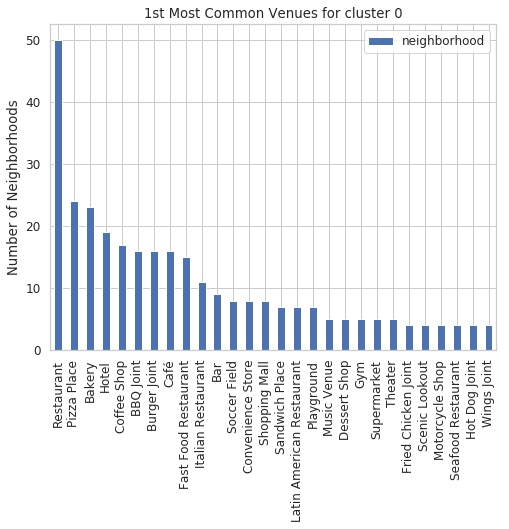

In [100]:
topvenues0=cluster0[["1st Most Common Venue","neighborhood"]].groupby("1st Most Common Venue").count().sort_values(by="neighborhood", ascending=False)
topvenues0[topvenues0["neighborhood"]>3].plot(kind="bar", figsize=(8,6))
plt.title("1st Most Common Venues for cluster 0")
plt.ylabel("Number of Neighborhoods")
plt.xlabel(None)
plt.xticks(rotation=90)

#### Cluser 1

In [92]:
cluster1=bogota_table.loc[bogota_table["Cluster Labels"] == 1, bogota_table.columns[[0]].tolist()+bogota_table.columns[+4:].tolist()]
print("There are {} neighborhoods in this cluster". format(cluster1.shape[0]))
cluster1

There are 14 neighborhoods in this cluster


,neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,ALAMEDA,1,Breakfast Spot,Construction & Landscaping,Park,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
87,CERROS DE SUBA,1,Playground,Construction & Landscaping,Paper / Office Supplies Store,Gym Pool,Fast Food Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
159,EL REFUGIO,1,Park,Construction & Landscaping,Latin American Restaurant,Moving Target,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
186,El Refugio,1,Park,Construction & Landscaping,Latin American Restaurant,Moving Target,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
197,GIRARDOT,1,Breakfast Spot,Construction & Landscaping,Market,Paper / Office Supplies Store,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
217,LA ALAMEDA,1,Breakfast Spot,Construction & Landscaping,Park,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
228,LA CITA,1,Construction & Landscaping,Trail,Thrift / Vintage Store,Forest,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Event Space
245,LA PICOTA SUR,1,Mountain,Piano Bar,Yoga Studio,Flea Market,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
318,MULTIFAMILIARES LA PAZ,1,Construction & Landscaping,Park,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market
343,PARQUES DE LORENA,1,Coffee Shop,Construction & Landscaping,Yoga Studio,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market


Text(0.5, 0, '')

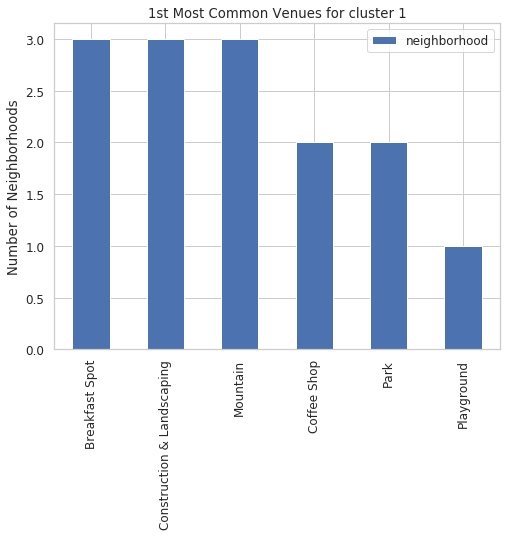

In [93]:
topvenues1=cluster1[["1st Most Common Venue","neighborhood"]].groupby("1st Most Common Venue").count().sort_values(by="neighborhood", ascending=False)
topvenues1[topvenues1["neighborhood"]>=1].plot(kind="bar", figsize=(8,6))
plt.title("1st Most Common Venues for cluster 1")
plt.ylabel("Number of Neighborhoods")
plt.xlabel(None)

#### Cluser 2

In [94]:
cluster2=bogota_table.loc[bogota_table["Cluster Labels"] == 2, bogota_table.columns[[0]].tolist()+bogota_table.columns[+4:].tolist()]
print("There are {} neighborhoods in this cluster". format(cluster2.shape[0]))
cluster2

There are 12 neighborhoods in this cluster


,neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,CALANDAIMA,2,Print Shop,Burger Joint,Shopping Mall,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
208,INGLES,2,Burger Joint,Yoga Studio,Flower Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food
287,MADELENA I Y II,2,Burger Joint,Warehouse Store,Butcher,Yoga Studio,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
288,MADELENA II Y IV,2,Burger Joint,Warehouse Store,Butcher,Yoga Studio,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
298,MILENTA II,2,Burger Joint,BBQ Joint,Restaurant,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market
317,MORABIA,2,Breakfast Spot,Cajun / Creole Restaurant,Burger Joint,Café,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
349,POLO CLUB,2,Gym,German Restaurant,Burger Joint,Music Venue,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
364,PUENTE ARANDA,2,Breakfast Spot,Burger Joint,Flower Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food
367,PUERTA DEL SOL,2,Market,Supermarket,Burger Joint,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Yoga Studio
381,RINCON DEL CEDRO,2,Breakfast Spot,Fast Food Restaurant,Burger Joint,Bar,Flower Shop,Farm,Farmers Market,Fish & Chips Shop,Flea Market,Food


Text(0.5, 0, '')

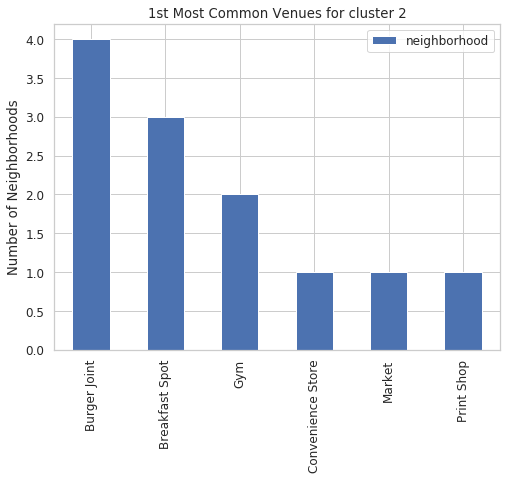

In [95]:
topvenues2=cluster2[["1st Most Common Venue","neighborhood"]].groupby("1st Most Common Venue").count().sort_values(by="neighborhood", ascending=False)
topvenues2[topvenues2["neighborhood"]>=1].plot(kind="bar", figsize=(8,6))
plt.title("1st Most Common Venues for cluster 2")
plt.ylabel("Number of Neighborhoods")
plt.xlabel(None)

#### Cluser 3

In [101]:
cluster3=bogota_table.loc[bogota_table["Cluster Labels"] == 3, bogota_table.columns[[0]].tolist()+bogota_table.columns[+4:].tolist()]
print("There are {} neighborhoods in this cluster". format(cluster3.shape[0]))
cluster3

There are 47 neighborhoods in this cluster


,neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,ALFEREZ REAL,3,Car Wash,Bakery,Fish & Chips Shop,Park,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market
17,ATENAS,3,Argentinian Restaurant,Gym / Fitness Center,Gymnastics Gym,Park,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
29,BELLAVISTA OCCIDENTAL,3,Breakfast Spot,Park,Ice Cream Shop,Bakery,Convenience Store,Fast Food Restaurant,Gymnastics Gym,Falafel Restaurant,Farm,Farmers Market
45,BOSQUE DEL MARQUES,3,Park,Food Truck,Ice Cream Shop,Bakery,Shopping Mall,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
57,BOYACA,3,Sandwich Place,Park,Motorcycle Shop,Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
59,BRITALIA,3,Pizza Place,Arepa Restaurant,Bakery,Restaurant,Gym,Fast Food Restaurant,Park,Fruit & Vegetable Store,Flower Shop,Flea Market
89,CERROS ORIENTALES,3,Bakery,Gym,Beer Garden,Ice Cream Shop,Park,Art Gallery,Supermarket,Bike Rental / Bike Share,Cocktail Bar,Soccer Field
169,EL TINTAL,3,Park,Department Store,Lake,Burger Joint,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
188,FLORENCIA,3,Park,Restaurant,Mexican Restaurant,Shopping Mall,Yoga Studio,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
209,JARDIN BOTANICO,3,Park,Restaurant,Recreation Center,Soccer Stadium,Bowling Alley,Pool,Italian Restaurant,Gym,Event Space,Exhibit


Text(0.5, 0, '')

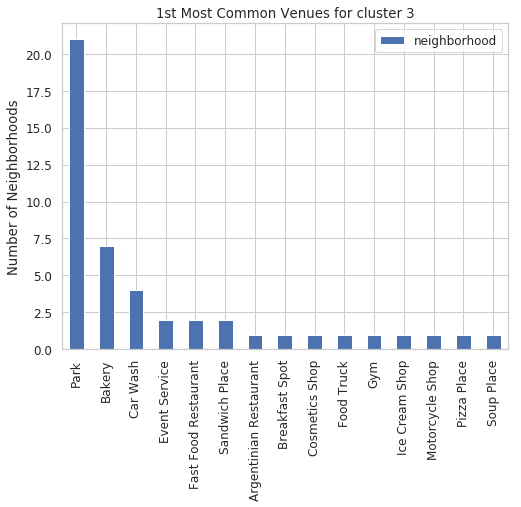

In [102]:
topvenues3=cluster3[["1st Most Common Venue","neighborhood"]].groupby("1st Most Common Venue").count().sort_values(by="neighborhood", ascending=False)
topvenues3[topvenues3["neighborhood"]>=1].plot(kind="bar", figsize=(8,6))
plt.title("1st Most Common Venues for cluster 3")
plt.ylabel("Number of Neighborhoods")
plt.xlabel(None)

#### Cluser 4

In [98]:
cluster4=bogota_table.loc[bogota_table["Cluster Labels"] == 4, bogota_table.columns[[0]].tolist()+bogota_table.columns[+4:].tolist()]
print("There are {} neighborhoods in this cluster". format(cluster4.shape[0]))
cluster4

There are 5 neighborhoods in this cluster


,neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
187,FLORALIA I,4,Restaurant,Fast Food Restaurant,Seafood Restaurant,Event Service,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Yoga Studio
195,GINEBRA,4,Spa,Restaurant,Event Service,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
196,GINEBRA NORTE,4,Spa,Restaurant,Event Service,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
219,LA CABAÑA,4,Restaurant,Yoga Studio,Event Service,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
418,SAN RAFAEL,4,Restaurant,Pet Store,Yoga Studio,Fast Food Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fish & Chips Shop


Text(0.5, 0, '')

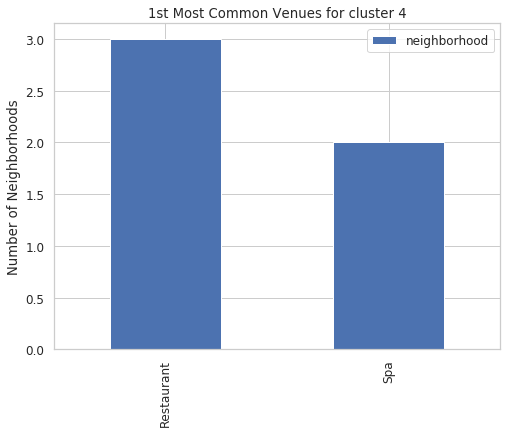

In [99]:
topvenues4=cluster4[["1st Most Common Venue","neighborhood"]].groupby("1st Most Common Venue").count().sort_values(by="neighborhood", ascending=False)
topvenues4[topvenues4["neighborhood"]>=1].plot(kind="bar", figsize=(8,6))
plt.title("1st Most Common Venues for cluster 4")
plt.ylabel("Number of Neighborhoods")
plt.xlabel(None)

### The most expensive and cheapest neighborhoods in bogota

For curiosity, let's explore which are the neighborhoods with the highest and lowest average prices in Bogotá.

#### TOP 5 expensive neighborhoods

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

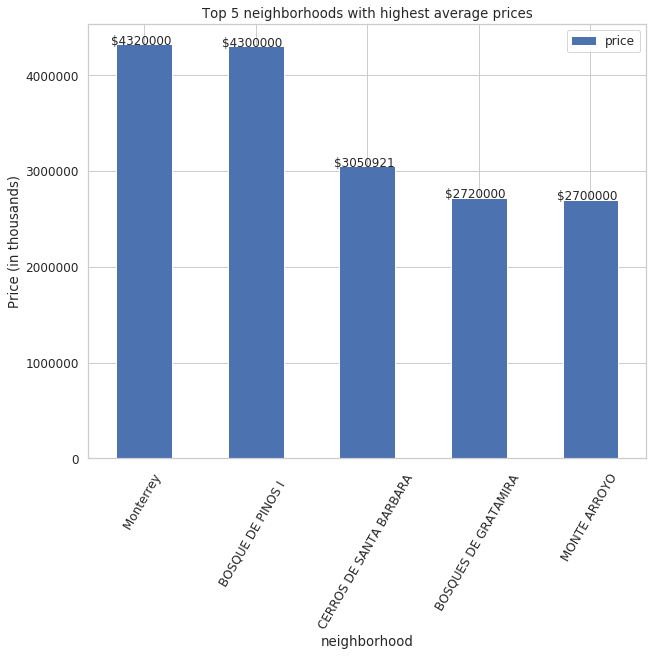

In [49]:
bogota_top5 = bogota.sort_values(["price"], ascending=False, axis=0).head()
bogota_top5.set_index("neighborhood", inplace=True)

ax=bogota_top5.plot(kind="bar", figsize=(10,8))
ax.set_title("Top 5 neighborhoods with highest average prices")
ax.set_ylabel("Price (in thousands)")


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate("${:0.0f}".format(height), (x-0.05, y + height), fontsize = 12)

plt.xticks(rotation=60)

#### TOP 5 cheapest neighborhoods

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

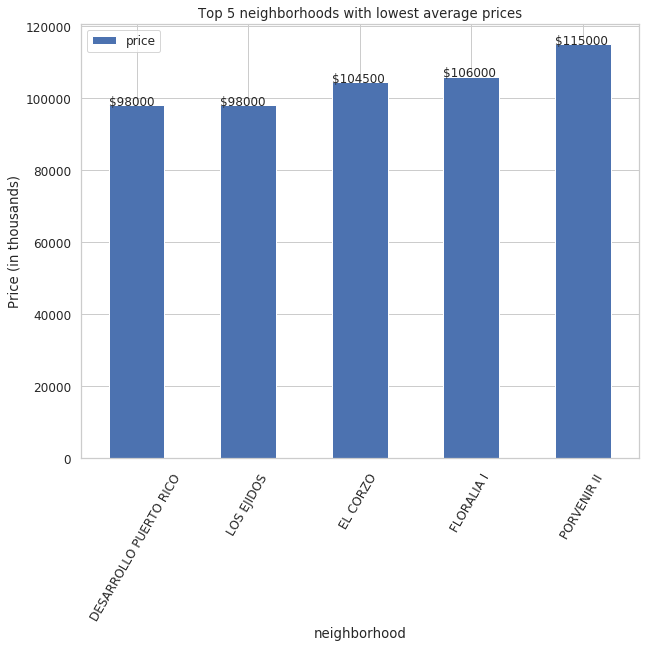

In [50]:
bogota_tail5 = bogota.sort_values(by="price").head()
bogota_tail5.set_index("neighborhood", inplace=True)

ax=bogota_tail5.plot(kind="bar", figsize=(10,8))
ax.set_title("Top 5 neighborhoods with lowest average prices")
ax.set_ylabel("Price (in thousands)")


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate("${:0.0f}".format(height), (x, y + height), fontsize = 12)

plt.xticks(rotation=60)

## 4. Conclusions and Considerations

From the final dataset analyzed it can be appreciated a very high housing offer that ranges from COP 85 million to COP 9.360 million areas between 15 m2 to 686 m2. It is important to highlight that the median of used apartment prices in Bogotá is COP $650 million. This means that 50% of the apartments analyzed have a price above this median and the other 50% have a price below this indicator. For instance, a simple bank mortgage credit exercise for 70% of that value with an effective annual rate of 10% paid in 15 years will need a monthly payment of COP 4.8 million. This is 5.4 times the current legal minimum wage for Colombia in 2020. According to official figures from [DANE](https://www.larepublica.co/economia/solo-34-millones-de-personas-gana-mas-de-dos-salarios-minimos-en-el-pais-2947122#:~:text=En%20el%20marco%20de%20la,8%2C11%20millones%20de%20personas) (Departamento Administrativo Nacional de Estadística) for 2019, 5 out of 10 workers earn less than 1 current legal minimum wage, and just 1 out of 10 earns 2 current legal minimum wage, which is a very alarming indicator.

From this information, we can infer 1 situation. People that can apply to high mortgage credit are limited by their purchasing power and according to the DANE economic statements, a very low percentage of people would by in the capacity of paying their credit obligations. Therefore, the people that are looking forward to sell their apartment are more likely to have a higher income than 90% of the population of Colombia.

In a city this big, finding the right place to live is an actual challenge. Bogotá D.C. is characterized by having a large number of commercial establishments that guarantee basic needs and recreational services in most of its neighborhoods. From the clustering process, the results show that in the 80% of neighborhoods analyzed, the principal venues are establishments that offer food services such as restaurants, burgers and pizza joints, and bakeries among others. Moreover, green zones play an important role in the social life of citizens. It is remarkable to clarify that some of the neighborhoods might be mislocated do to the GeoCoder process of retrieving the coordinates as it was seen before.